# Toturial

## Importing packages

In [23]:
from aleatory.path.path import *
from aleatory.processes.base import *
from aleatory.processes.randomness import *
from aleatory.processes.unidim import *
from aleatory.transition.base import *

## Defining the time set 

In [24]:
years = 5
time = np.linspace(0,years,num=365*years)

## Creating the model

In [25]:
bm = BrownianMotion(time_end=years)
# A simple CKLS process :
model = CKLSProcess(kappa=0.18,b=0.05,sigma=0.16,gamma=1/2,bm=bm)

## Simulating the model 

c:\Users\DELL\Desktop\Python\amd_pack\aleatory\processes\unidim.py:151: RuntimeWarning: invalid value encountered in sqrt
  diffusion = lambda t,x : sigma*(x**gamma)


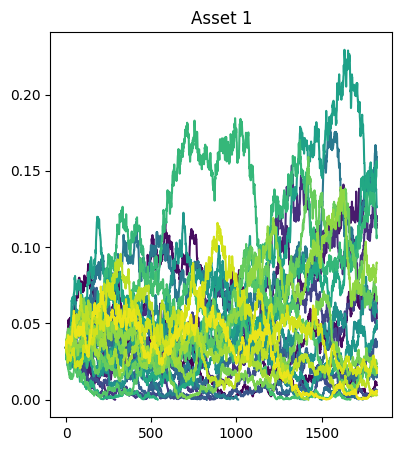

In [26]:
## we can use the euler descritisation :
data = model.simulate_path(X0=0.034,time=time,num_scenarios=30)
data.plot_process()

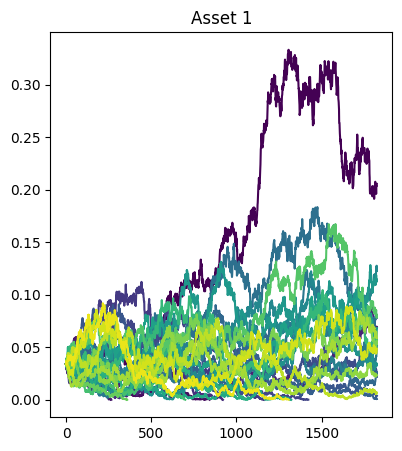

In [27]:
## we can use the Milshtein descritisation :
data = model.simulate_path(X0=0.034,time=time,num_scenarios=30)
model.method = Milstein1D(model.drift,model.diffusion)
data.plot_process()

## Creating a data sample to calibrate :

In [28]:
data = model.simulate_path(X0=0.034,time=time,num_scenarios=1)

## Calculating likelihood :

In [29]:
model.method = Euler1D(model.drift,model.diffusion)
model.negLogLikeLihood(data)

-9736.439333290706

## Calibrating 

In [30]:
model.calibrate(data,method='MLE')

C:\tools\Manim\Lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


          message: `xtol` termination condition is satisfied.
          success: True
           status: 2
              fun: -10695.4707404787
                x: [ 6.532e-01  5.606e-02 -5.920e-02  1.092e-02]
              nit: 112
             nfev: 560
             njev: 112
             nhev: 0
         cg_niter: 310
     cg_stop_cond: 2
             grad: [-3.662e-04 -2.441e-04  1.221e-03  1.221e-04]
  lagrangian_grad: [-3.662e-04 -2.441e-04  1.221e-03  1.221e-04]
           constr: []
              jac: []
      constr_nfev: []
      constr_njev: []
      constr_nhev: []
                v: []
           method: equality_constrained_sqp
       optimality: 0.001220703125
 constr_violation: 0
   execution_time: 115.91920471191406
        tr_radius: 9.288230589609266e-09
   constr_penalty: 1.0
            niter: 112